# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;"> Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;"> Los datos no estaban separados por coma, por lo que se debió especificar el separador ";" en el parámetro sep = al momento de leer los DF

In [ ]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# leer conjuntos de datos en los DataFrames
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')

# Imprimo las 5 primeras filas de los DF para tener un vistazo del contenido y entender mejor cómo se representan los datos en las columnas
print(aisles.head())
print('_'*100)
print(departments.head())
print('_'*100)
print(orders.head())
print('_'*100)
print(order_products.head())
print('_'*100)
print(products.head())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
____________________________________________________________________________________________________
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
____________________________________________________________________________________________________
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4     

In [ ]:
# mostrar información del DataFrame
aisles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
# mostrar información del DataFrame
departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
# mostrar información del DataFrame
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [ ]:
# mostrar información del DataFrame
products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Conclusiones

<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Hay valores nulos en algunos de los DF: Debemos analizarlos y verificar si son relevantes para el análisis final.
- orders; columna days_since_prior_order.
- order_products; columna add_to_cart_order,
- products; columna product_name, tipo de datos object (categóricos)
    
    


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">
    
## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
### 1. Verificación y corrección de tipos de datos
Los tipos de datos en las columnas ID son todos correctos. Los datos que son float no perjudican el análisis final y veremos más adelante si es necesario convertirlos a entero.

### 2. Hallazgo y tratamiento de datos duplicados
Se deben verificar los DF para analizar si hay datos duplicados y si son explícitos o implícitos y decidir qué hacer con ellos en cada caso.

### 3. Identificación y tratamiento de valores ausentes
1. orders; columna days_since_prior_order.  
    Esta columna se refiere al número de días transcurridos desde que este cliente hizo su pedido, por lo que podemos inferir que un valor ausente signifique que el usuario no había realizado compras anteriores. Es decir, es su primera compra. El NaN indica “no existe pedido previo”.

   *Mantenerlo conserva semántica*
2. order_products; columna add_to_cart_order.  
   Esta columna se refiere a el orden secuencial en el que se añadió cada artículo en el carrito. Si aparece NA será error de origen.

   *Eliminar fila*

3. products; product_name.
   Esta columna nos da el nombre del producto. Si hay NaN, se debería investigar porqué y completar manualmente con “Unknown”.

   *Completar con “Unknown”*
   

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados
print(orders.duplicated().sum())
dups = orders[orders.duplicated(keep=False)].sort_values('order_id')
dups.head()

15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?  
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">R. El order_id y user_id se repiten en todos los duplicados, por lo que puede ser un error en la recolección de datos.

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

# Filtro pedidos del miércoles (3) a las 2:00 a.m.
# 0 = domingo  3 = miércoles
wed_2am_dups = dups.query('order_dow == 3 and order_hour_of_day == 2')
print(wed_2am_dups)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3                  2   
119251    408114    68324             4          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
250626    467134    63189            21          3                  2   
99462     794638    50898            24          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
242618   1021560    53767             3          3                  2   
164581   1112182   202304            84          3                  2   
273805   1112182   202304            84          3                  2   
314427   1286742   183220            48          3 

¿Qué sugiere este resultado?  
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">R. Los datos duplicados son un error, por lo que podemos eliminar las filas. Es curioso que todos los duplicados de este DF se presentaran el miércoles a las 2 am.  

En la práctica, cuando los duplicados se agrupan en un mismo “timestamp” (día-hora) suele apuntar a un fallo puntual de procesamiento más que a un error de captura del usuario, por lo que eliminaremos las copias idénticas y conservamos una sola ocurrencia por order_id para evitar sobre-contar ventas.

In [ ]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates().reset_index(drop=True)

In [ ]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

0

In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
order_id_dups = orders['order_id'].duplicated().sum()

print(f"Pedidos con ID duplicado: {order_id_dups}")

Pedidos con ID duplicado: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.  

<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">R. Durante el preprocesamiento, se identificaron 15 filas duplicadas exactas en el DataFrame orders. Estas filas tenían los mismos valores en todas sus columnas, incluido el order_id, y correspondían a pedidos registrados el miércoles a las 2:00 a.m. Este patrón sugiere que probablemente se trató de un error en la carga o exportación del dataset, tal vez una duplicación generada por un proceso automático programado durante la madrugada.

Dado que las filas eran completamente idénticas, se consideraron redundantes y fueron eliminadas.  

Posteriormente, se verificó que no quedaran order_id duplicados en el DataFrame. Se comprobó que cada pedido tuviera un identificador único, lo cual es esencial para mantener la integridad del análisis.
No se encontraron duplicados adicionales, por lo que no fue necesario realizar más ajustes.



### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

0

In [ ]:
#Nombres de las columnas del DF products
print(products.columns)

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')


In [ ]:
# Revisa únicamente si hay ID de productos duplicados
products['product_id'].duplicated().sum()

0

In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
# Cambiar los nombres a mayúsculas
product_names_upper = products['product_name'].str.upper()

# Verificar cuántos están duplicados
product_names_upper.duplicated().sum()

1361

In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes
#(verificar si hay nombres de productos duplicados, excluyendo los valores faltantes (NaN) o vacíos.)

# 1. Filtrar los nombres no nulos
product_names_clean = products['product_name'].dropna().str.upper()

# 2. Ver cuántos están duplicados (sin incluir nulos)
duplicated_non_null = product_names_clean.duplicated(keep=False)

# 3. Mostrar cuántos duplicados hay
print(f"Nombres duplicados (sin nulos): {duplicated_non_null.sum()}")

Nombres duplicados (sin nulos): 207


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">Podemos confirmar que No hay filas completamente iguales en este DF.  

Tampoco tenemos ID de productos duplicados, pero sí tenemos nombres de productos duplicados.  
    
En la primera observación de los nombres, al transformarlos todos a mayúsculas, vemos que hay 1361 datos duplicados, pero cuando los filtramos para no tomar en cuenta los NaN, vemos que hay 207 valores duplicados.  

Como no tengo más contexto sobre esos nombres duplicados en este caso (En la práctica solicitaría más información sobre la categorización de los productos), y ya que todos los product_id son únicos y correctos, los dejaré como están, asegurándome de usar product_id como clave, no product_name, en análisis futuros.

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [ ]:
#Nombres de las columnas del DF departments
print(departments.columns)

Index(['department_id', 'department'], dtype='object')


In [ ]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;"> No hay filas duplicadas y tampoco hay valores duplicados en el ID del departamento, lo que indica que están bien categorizados y no se repiten. No es necesario hacer nada en este punto.

### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [ ]:
#Nombres de las columnas del DF aisles
aisles.columns

Index(['aisle_id', 'aisle'], dtype='object')

In [ ]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;"> No hay filas duplicadas y tampoco hay valores duplicados en el ID del pasillo (aisle), lo que indica que están bien categorizados y no se repiten. No es necesario hacer nada en este punto.

### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [ ]:
#Columnas
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

#Aunque no haya duplicados fila a fila, puede que se repitan combinaciones como: ['order_id', 'product_id'].
#Eso indicaría que el mismo producto fue registrado más de una vez en el mismo pedido, lo cual podría ser un error.
# Verificar si hay productos repetidos por pedido:
# ¿Algún producto aparece más de una vez en el mismo pedido?
dup_comb = order_products.duplicated(subset=['order_id', 'product_id'], keep=False)

print(order_products[dup_comb].sort_values(['order_id', 'product_id']).head())

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">
Aunque no hay filas duplicadas en este DF, primero quise verificar si habían casos donde un mismo producto (product_id) aparece más de una vez dentro del mismo pedido (order_id). Eso indicaría que el mismo producto fue registrado más de una vez en el mismo pedido, lo cual podría ser un error. No hay duplicados de esta combinación, lo que sigifica que no hay pedidos con líneas duplicadas del mismo producto.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products['product_name'].isna().sum())
products[products['product_name'].isna()]

1258


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">  
Se identificaron 1,258 valores faltantes en la columna product_name.

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[products['product_name'].isna()].groupby('aisle_id').size())

aisle_id
100    1258
dtype: int64


Describe brevemente cuáles son tus hallazgos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">  
Este resultado confirma que los 1,258 valores ausentes en product_name pertenecen todos al mismo aisle_id (100)

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[products['product_name'].isna()].groupby('department_id').size())

department_id
21    1258
dtype: int64


Describe brevemente cuáles son tus hallazgos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">  
Confirmamos que todos los valores ausentes en product_name también pertenecen al department_id 21.

In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
pivot_missing = products[products['product_name'].isna()].pivot_table(
    index='aisle_id',
    columns='department_id',
    values='product_id',  # usamos una columna que NO tiene NaN
    aggfunc='count',
    fill_value=0
)

pivot_missing

department_id,21
aisle_id,
100,1258


Describe brevemente cuáles son tus hallazgos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">  
Creamos una tabla dinámica para identificar en qué combinaciones de pasillo y departamento se concentran los valores ausentes en product_name.  

Esto confirma que todos los productos con nombre ausente pertenecen al pasillo 100 y al departamento 21, los cuales en las otras tablas se identifican como "missing aisle" y "missing department".  
Esto refuerza nuestra decisión de reemplazar esos nombres con "Unknown" para conservar las observaciones sin afectar el análisis.

In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
print(products['product_name'].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">  
Reemplazamos los valores ausentes en product_name con el texto "Unknown"
Esta solución nos permite conservar los registros para futuros análisis, evitando pérdida de datos valiosos y asegurando consistencia en operaciones posteriores como agrupamientos o visualización.

### `orders` data frame

In [ ]:
# Encuentra los valores ausentes
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[orders['days_since_prior_order'].isna()].head() #Vemos más a detalle los NaN de la columna 'days_since_prior_order'

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN


In [ ]:
orders[orders['days_since_prior_order'].isna()]['order_number'].value_counts() #Contamos los NaN en 'days_since_prior_order' para detectar cuántos están en el primer pedido del cliente

1    28817
Name: order_number, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">  
Se detectaron valores ausentes en la columna "days_since_prior_order¨. Al analizarlos, se encontró que todos corresponden al primer pedido de cada cliente (1), lo cual es lógico, ya que no existe un pedido anterior para calcular los días transcurridos.
Por lo tanto, estos NaN no representan un error de captura ni pérdida de datos, sino un valor esperado por la naturaleza del proceso.  
    
Decidimos conservar estos valores tal como están, ya que no es necesario imputarlos ni eliminarlos.

### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products['add_to_cart_order'].agg(['min', 'max'])

min     1.0
max    64.0
Name: add_to_cart_order, dtype: float64

Describe brevemente cuáles son tus hallazgos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">  
1.0 indica que al menos un producto fue el primero en ser añadido al carrito.

64.0 sugiere que hay pedidos con hasta 64 productos (el producto número 64 agregado).

Esto está dentro de lo esperado: add_to_cart_order simplemente representa el orden en el que se agregaron los productos al carrito dentro de un pedido.

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_cart_orders = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique() # Usamos unique() para obtener solo una vez cada ID (sin repeticiones).
print(missing_cart_orders)
len(missing_cart_orders)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


70

In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_rows = order_products[order_products['add_to_cart_order'].isna()]
product_counts = missing_rows.groupby('order_id')['product_id'].count()
product_counts.min()


1

Describe brevemente cuáles son tus hallazgos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">
Se identificaron 836 valores ausentes en la columna 'add_to_cart_order', la cual representa el orden en que se agregaron los productos al carrito en un pedido.

Al analizar los pedidos asociados a esos valores ausentes, se encontró que algunos tienen tan solo un producto, mientras que otros pueden tener más.
Esto indica que los NaN no están relacionados con la cantidad total de productos en el pedido (es decir, no se deben a pedidos con más de 64 productos, que era el máximo observado anteriormente).

Estos valores ausentes probablemente se deban a errores en la captura o procesamiento de los datos. Se recomienda imputarlos con un valor por defecto o eliminarlos si afectan el análisis posterior.

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999) #Reemplaza valores NaN por 999
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int) # convierte la columna al tipo entero.
order_products[order_products['add_to_cart_order'] == 999].head() #Comprobación de los cambios

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">
    
Durante el análisis del DataFrame order_products, se identificaron 836 valores ausentes en la columna add_to_cart_order, la cual representa el orden en que los productos fueron agregados al carrito dentro de cada pedido.

Al investigar más a fondo, se observó que estos valores ausentes no corresponden exclusivamente a pedidos grandes (por ejemplo, con más de 64 productos, que era el valor máximo observado previamente). De hecho, algunos de estos pedidos con valores ausentes contenían solamente un producto. Esto sugiere que los NaN no están relacionados con la longitud del pedido, sino que probablemente se deban a errores de captura o procesamiento.

Dado que esta columna es numérica y se requiere conservar su estructura para análisis posteriores, se decidió:

Imputar los valores ausentes con el número 999, como valor atípico y fácil de identificar, y luego convertir la columna a tipo entero (int).

Este valor actúa como marcador especial, permitiendo incluir estos registros sin distorsionar visualizaciones o cálculos que dependen del orden secuencial original de agregado al carrito.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">
Durante esta etapa, se realizó una revisión exhaustiva de los cinco DataFrames (orders, order_products, products, departments y aisles) para asegurar su calidad antes de cualquier análisis. A continuación, se resumen los principales hallazgos y acciones:

- Tipos de datos
  - Se verificaron los tipos de datos en todas las columnas. Las columnas de ID ya estaban correctamente configuradas como int.

  - En el DataFrame order_products, la columna add_to_cart_order se encontraba en formato float64 debido a la presencia de valores nulos. Tras imputarlos, la columna fue convertida a tipo entero (int) para reflejar su verdadero propósito (el orden en que los productos fueron añadidos al carrito).

- Valores duplicados
  - En orders se encontraron 15 filas completamente duplicadas, todas con pedidos registrados un miércoles a las 2:00 a.m. Se eliminaron, asumiendo que se trataba de errores de registro o pruebas del sistema.

  - En products, no se encontraron filas ni IDs duplicados, pero sí se detectaron 207 nombres de productos duplicados (ignorando mayúsculas y valores nulos). Estos casos se conservaron, ya que pueden representar productos similares o formatos distintos con el mismo nombre.

  - En order_products, no hubo filas completamente duplicadas ni combinaciones repetidas de order_id y product_id.

- Valores ausentes
  - En products, se encontraron 1,258 valores faltantes en product_name que  estaban todos asociados al aisle_id 100 y department_id 21 (categorías denominadas "missing"). Se completaron con el texto "Unknown" para conservar los registros.

  - En orders, 28,817 valores nulos en days_since_prior_order coincidieron con todos los primeros pedidos de cada cliente (order_number == 1), por lo que no fueron imputados ni modificados.

  - En order_products, 836 valores ausentes en add_to_cart_order no mostraron un patrón claro por tamaño del pedido. Se decidió imputarlos con el valor 999 como marcador identificable, y luego convertir la columna a tipo entero (int).


### Reflexión
Los valores ausentes y duplicados parecen derivarse tanto de condiciones naturales del negocio (como primeros pedidos o productos sin descripción) como de modificaciones controladas para fines del proyecto. Cada decisión de limpieza fue tomada cuidadosamente, con el objetivo de mantener la mayor cantidad de datos útiles sin comprometer la integridad del análisis.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
print("Valores únicos en 'order_hour_of_day':", orders['order_hour_of_day'].unique())
print("Mínimo:", orders['order_hour_of_day'].min(), " | Máximo:", orders['order_hour_of_day'].max())

Valores únicos en 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
Mínimo: 0  | Máximo: 23


In [ ]:
print("\nValores únicos en 'order_dow':", orders['order_dow'].unique())
print("Mínimo:", orders['order_dow'].min(), " | Máximo:", orders['order_dow'].max())


Valores únicos en 'order_dow': [6 5 0 4 3 1 2]
Mínimo: 0  | Máximo: 6


Escribe aquí tus conclusiones
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">

Con esto podemos confirmar que:

- Las horas (order_hour_of_day) estén entre 0 y 23

- Los días de la semana (order_dow) estén entre 0 y 6

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [ ]:
orders.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

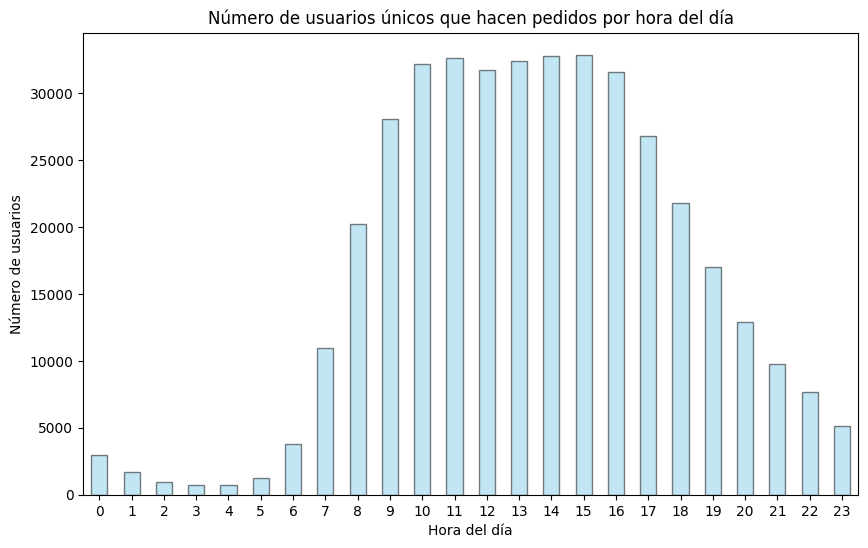

In [ ]:
# Objetivo: Contar cuántos usuarios únicos (user_id) hacen pedidos en cada hora del día (order_hour_of_day), y visualizarlo. Con DF orders

# Agrupar por hora del día y contar usuarios únicos
users_by_hour = orders.groupby('order_hour_of_day')['user_id'].nunique()
#Graficar
users_by_hour.plot(kind='bar',
                   color='skyblue',
                   edgecolor='black',
                   figsize=(10, 6),
                   title='Número de usuarios únicos que hacen pedidos por hora del día',
                   xlabel='Hora del día',
                   ylabel= 'Número de usuarios',
                   alpha=0.5,
                   rot=0)
#Mostrar Gráfica
plt.show()

Escribe aquí tus conclusiones
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">

El gráfico evidencia que la actividad de pedidos aumenta de manera constante desde las 7:00 a.m., alcanzando su punto más alto entre las 10:00 a.m. y 3:00 p.m., donde el número de usuarios únicos supera los 30,000 por hora.

Después de las 4:00 p.m., la actividad comienza a disminuir progresivamente, lo que sugiere que la mayoría de los pedidos se realizan durante la mañana y primeras horas de la tarde, probablemente cuando los usuarios están planificando su día o su consumo semanal.

Este comportamiento puede ser útil para:

- Optimizar la logística de entregas.

- Ajustar campañas promocionales a las horas de mayor tráfico.

- Comprender los hábitos de consumo por franja horaria.


### [A3] ¿Qué día de la semana compran víveres las personas?

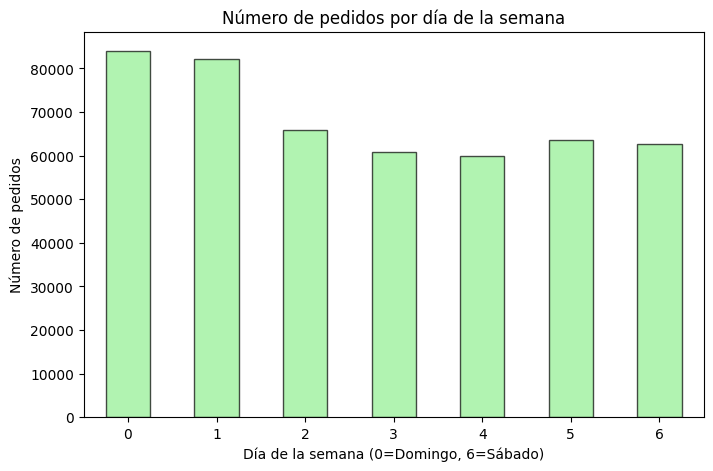

In [ ]:
# Contar pedidos por día de la semana
orders_by_day = orders['order_dow'].value_counts().sort_index()

# Graficar
orders_by_day.plot(kind='bar',
                   color='lightgreen',
                   edgecolor='black',
                   figsize=(8,5),
                   title='Número de pedidos por día de la semana',
                   xlabel='Día de la semana (0=Domingo, 6=Sábado)',
                   ylabel='Número de pedidos',
                   alpha=0.7,
                   rot=0)

# Mostrar gráfica
plt.show()

Escribe aquí tus conclusiones
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">

Se analizaron los pedidos realizados según el día de la semana. El resultado muestra que la mayor parte de los pedidos ocurren los domingos y lunes, lo que sugiere que las personas planifican sus compras al comenzar la semana o durante el fin de semana.

Esto puede ser útil para estrategias de promociones, abastecimiento de productos o refuerzos logísticos en esos días con alta demanda.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

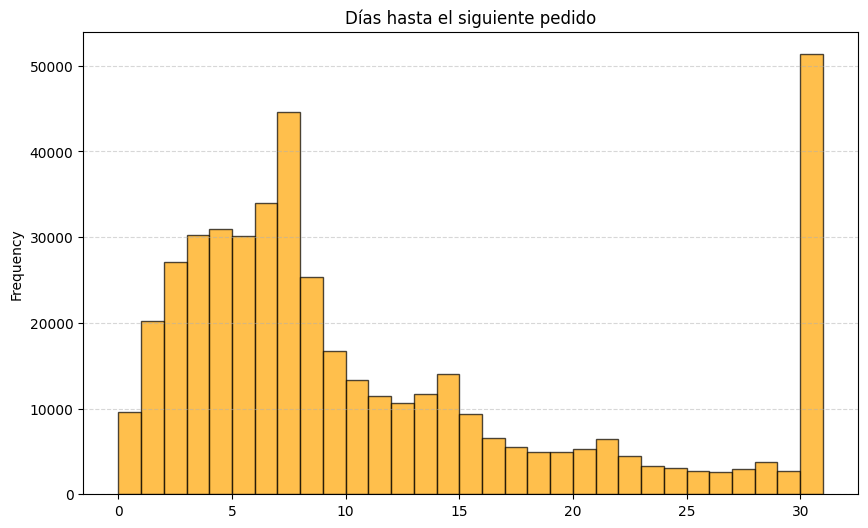

In [ ]:
# Objetivo: Visualizar la distribución de la columna days_since_prior_order del DF orders, para entender cuánto tiempo esperra la gente para hacer otro pedido.

# Filtrar valores no nulos
days_between_orders = orders['days_since_prior_order'].dropna()

# Graficar histograma
days_between_orders.plot(kind='hist',
                         bins=range(0, 32),  # de 0 a 31 días
                         edgecolor='black',
                         color='orange',
                         title='Días hasta el siguiente pedido',
                         xlabel='Días desde el pedido anterior',
                         ylabel='Número de pedidos',
                         figsize=(10,6),
                         alpha=0.7)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Escribe aquí tus conclusiones
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">

El análisis de la columna 'days_since_prior_order' muestra que:

- El tiempo más común entre pedidos es de **7 días**, lo que indica una fuerte tendencia de pedidos semanales.
- También se observa un pico en los **30 días**, lo cual puede deberse a usuarios que compran mensualmente o  truncado en el sistema para valores fuera del rango original (podría ser artificial).

El valor mínimo es **0 días**, indicando compras múltiples en el mismo día, y el máximo es **30 días**. La mayoría de los pedidos están concentrados entre los días 5 y 10.


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
# Filtrar pedidos de miércoles y sábado
wednesday_orders = orders[orders['order_dow'] == 3]
saturday_orders = orders[orders['order_dow'] == 6]

In [ ]:
# Contar pedidos por hora
wednesday_by_hour = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_by_hour = saturday_orders['order_hour_of_day'].value_counts().sort_index()

In [ ]:
# Crear DataFrame combinado
hour_comparison = pd.DataFrame({
    'Miércoles': wednesday_by_hour,
    'Sábado': saturday_by_hour
})

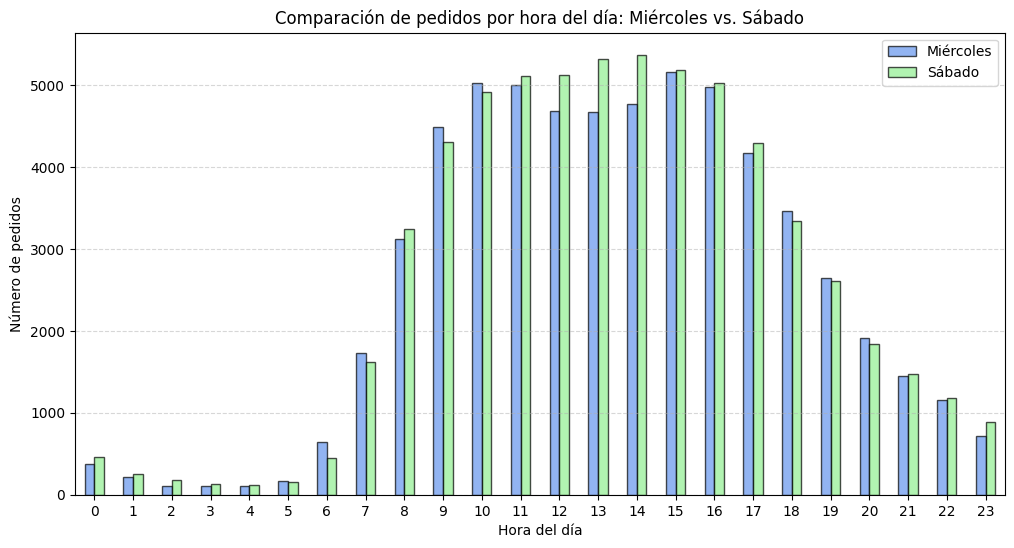

In [ ]:
# Graficar
hour_comparison.plot(kind='bar',
                     figsize=(12,6),
                     alpha=0.7,
                     title='Comparación de pedidos por hora del día: Miércoles vs. Sábado',
                     xlabel='Hora del día',
                     ylabel='Número de pedidos',
                     color=['cornflowerblue', 'lightgreen'],
                     edgecolor='black',
                     rot=0
                    )

# Mostrar gráfica
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Escribe aquí tus conclusiones
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">


Se compararon los patrones de pedido por hora en miércoles (order_dow = 3) y sábado (order_dow = 6).

**Hallazgos clave:**

- Ambos días muestran **alta actividad entre las 10:00 y las 15:00 horas**.
- Los **miércoles** tienen un inicio de actividad más temprano, con más pedidos a partir de las **7:00 a.m.**, lo cual podría deberse a rutinas laborales.
- Los **sábados** presentan una ligera concentración de pedidos en la **tarde**, especialmente después de las **13:00 horas**, lo que puede reflejar hábitos de compra de fin de semana.
- Después de las **17:00 horas**, ambos días comienzan a disminuir su actividad de manera similar.



### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [ ]:
# para el análisis B2 vamos a trabajar con la columna order_number en el DataFrame orders, ya que indica cuántos pedidos ha hecho cada cliente.
orders.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [ ]:
# Objetivo: Visualizar cuántos clientes han realizado 1, 2, 3, … n pedidos.
# Contar cuántos pedidos ha hecho cada cliente
pedidos_por_cliente = orders.groupby('user_id')['order_id'].count()


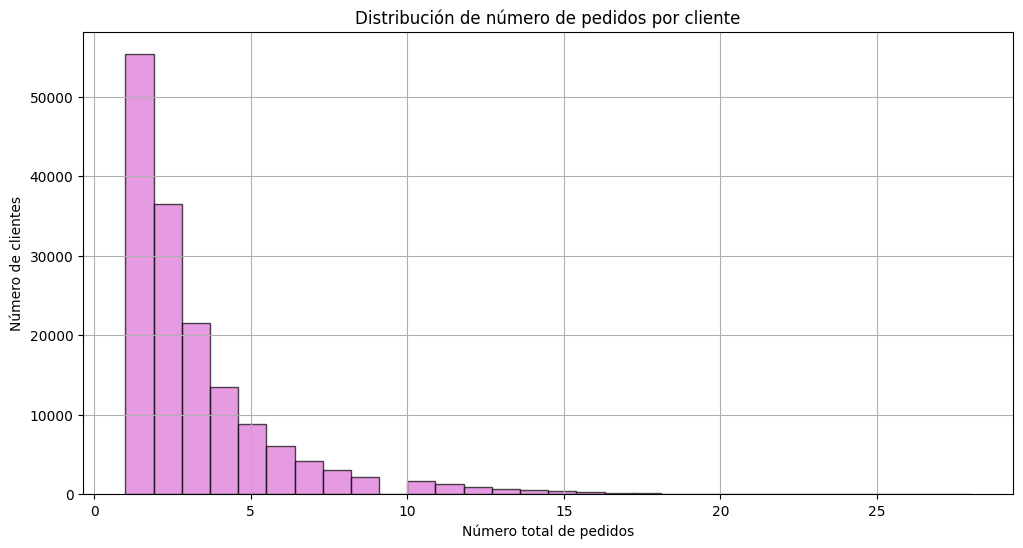

In [ ]:
# Histograma usando .hist()
pedidos_por_cliente.hist(bins=30,
                         figsize=(12, 6),
                         color='orchid',
                         edgecolor='black',
                         alpha=0.7)

plt.title('Distribución de número de pedidos por cliente')
plt.xlabel('Número total de pedidos')
plt.ylabel('Número de clientes')
plt.show()


Escribe aquí tus conclusiones
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">
Para entender cuántos pedidos realiza cada cliente, realizamos un análisis de frecuencia utilizando la columna user_id de la tabla orders.

Pasos:
1. Agrupamos los datos por user_id y contamos cuántos pedidos (order_id) ha hecho cada uno.
2. Luego, graficamos esta información usando un histograma para visualizar la distribución.


Interpretación del gráfico:
- La mayoría de los clientes ha realizado sólo entre 1 y 2 pedidos.
- A medida que incrementa el número total de pedidos, disminuye la cantidad de clientes que llegan a ese nivel.
- Se observa una distribución sesgada hacia la izquierda, lo cual es típico en plataformas de e-commerce: muchos usuarios nuevos o esporádicos, pocos usuarios muy fieles.

Esta información puede ser útil para:
- Diseñar estrategias de retención de clientes.
- Identificar segmentos de clientes frecuentes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [ ]:
# 1. Contar cuántas veces se pidió cada producto
top_products = order_products['product_id'].value_counts().head(20).reset_index()
top_products.columns = ['product_id', 'times_ordered']

# 2. Unir con la tabla de productos para obtener los nombres
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# 3. Mostrar los resultados
print(top_products[['product_id', 'product_name', 'times_ordered']])

    product_id              product_name  times_ordered
0        24852                    Banana          66050
1        13176    Bag of Organic Bananas          53297
2        21137      Organic Strawberries          37039
3        21903      Organic Baby Spinach          33971
4        47209      Organic Hass Avocado          29773
5        47766           Organic Avocado          24689
6        47626               Large Lemon          21495
7        16797              Strawberries          20018
8        26209                     Limes          19690
9        27845        Organic Whole Milk          19600
10       27966       Organic Raspberries          19197
11       22935      Organic Yellow Onion          15898
12       24964            Organic Garlic          15292
13       45007          Organic Zucchini          14584
14       39275       Organic Blueberries          13879
15       49683            Cucumber Kirby          13675
16       28204        Organic Fuji Apple        

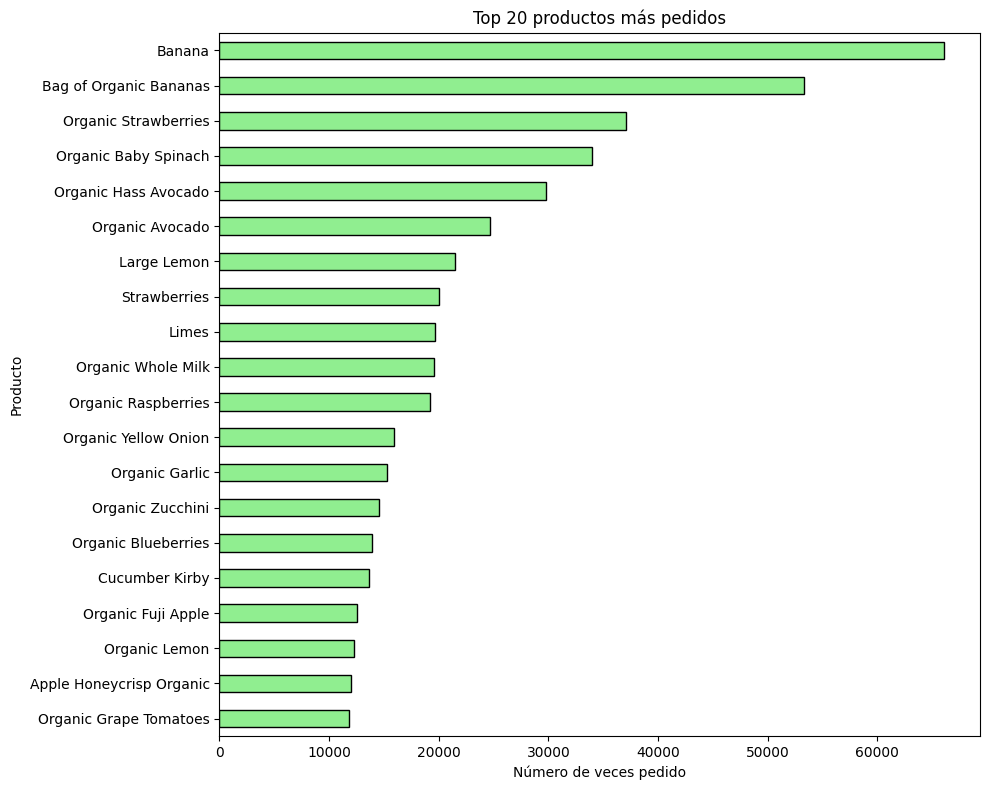

In [ ]:
# Gráfico de los productos más pedidos
top_products.plot(kind='barh',
                  x='product_name',
                  y='times_ordered',
                  figsize=(10, 8),
                  legend=False,
                  color='lightgreen',
                  edgecolor='black',
                  title='Top 20 productos más pedidos')
plt.xlabel('Número de veces pedido')
plt.ylabel('Producto')
plt.gca().invert_yaxis()  # para que el más pedido esté arriba
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">
    
Banana y Bag of Organic Bananas son, por mucho, los productos más populares.
La mayoría del top 20 son productos orgánicos, lo que da pistas del perfil de los consumidores.
    Podemos concluir que:

  1. Alta preferencia por productos frescos y orgánicos:
  La mayoría de los productos más pedidos son frutas, verduras y vegetales orgánicos: bananas, fresas, espinaca, aguacate, cebolla, ajo, etc.  
  Esto sugiere que muchos clientes priorizan una alimentación saludable y están dispuestos a pagar más por versiones orgánicas de productos básicos.

  2. Consumo recurrente de productos esenciales: Los artículos más pedidos son productos de alta rotación que probablemente se compran semanal o quincenalmente.

  Ejemplos: leche, bananas, ajo, limón, todos son ingredientes comunes y versátiles que se consumen rápidamente.



# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
# Usamos el DataFrame order_products para contar cuántos product_id hay por cada order_id
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [ ]:
# Contar cuántos productos se compraron por cada pedido
items_per_order = order_products.groupby('order_id')['product_id'].count()

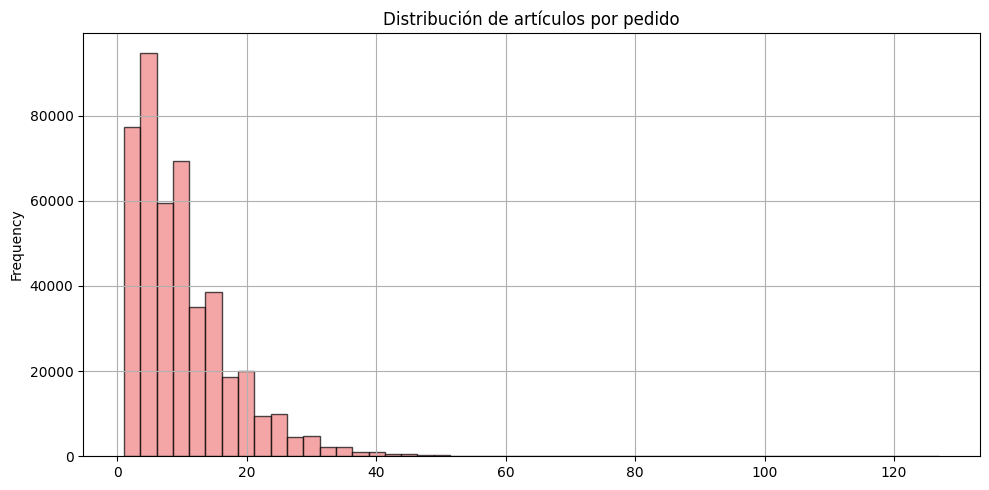

In [ ]:
# Visualizar la distribución
items_per_order.plot(kind='hist',
                     bins=50,
                     color='lightcoral',
                     edgecolor='black',
                     alpha=0.7,
                     title='Distribución de artículos por pedido',
                     figsize=(10, 5),
                     xlabel='Número de artículos en el pedido',
                     ylabel='Número de pedidos')

plt.grid(True)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">
    
- La mayoría de los pedidos contienen entre 3 y 15 artículos, siendo este rango el más común.

- Esto sugiere que los usuarios generalmente hacen compras pequeñas o medianas, posiblemente de reposición semanal o complementaria.

- Hay algunos pocos pedidos con más de 50 artículos, pero son casos excepcionales. Esto puede representar compras familiares grandes, compras grupales o usuarios con un patrón de consumo poco común.

- La distribución decrece rápidamente, lo que confirma que los pedidos grandes son raros, y que la plataforma se usa principalmente para compras rápidas o regulares.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
order_products.columns
#usamos la columna reordered del DF order_products
#reordered = 1 significa que ese producto fue pedido nuevamente por el mismo cliente.

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [ ]:
# Filtrar solo los productos que fueron reordenados
reordered = order_products[order_products['reordered'] == 1]

# Contar cuántas veces se reordenó cada product_id
top_reordered_counts = reordered['product_id'].value_counts().head(20)

# Convertir a DF
top_reordered_df = top_reordered_counts.reset_index()
top_reordered_df.columns = ['product_id', 'reorder_count']

# Unir con products para obtener los nombres
top_reordered_products = top_reordered_df.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar resultado final
top_reordered_products[['product_id', 'product_name']]

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,27845,Organic Whole Milk
7,47626,Large Lemon
8,27966,Organic Raspberries
9,16797,Strawberries


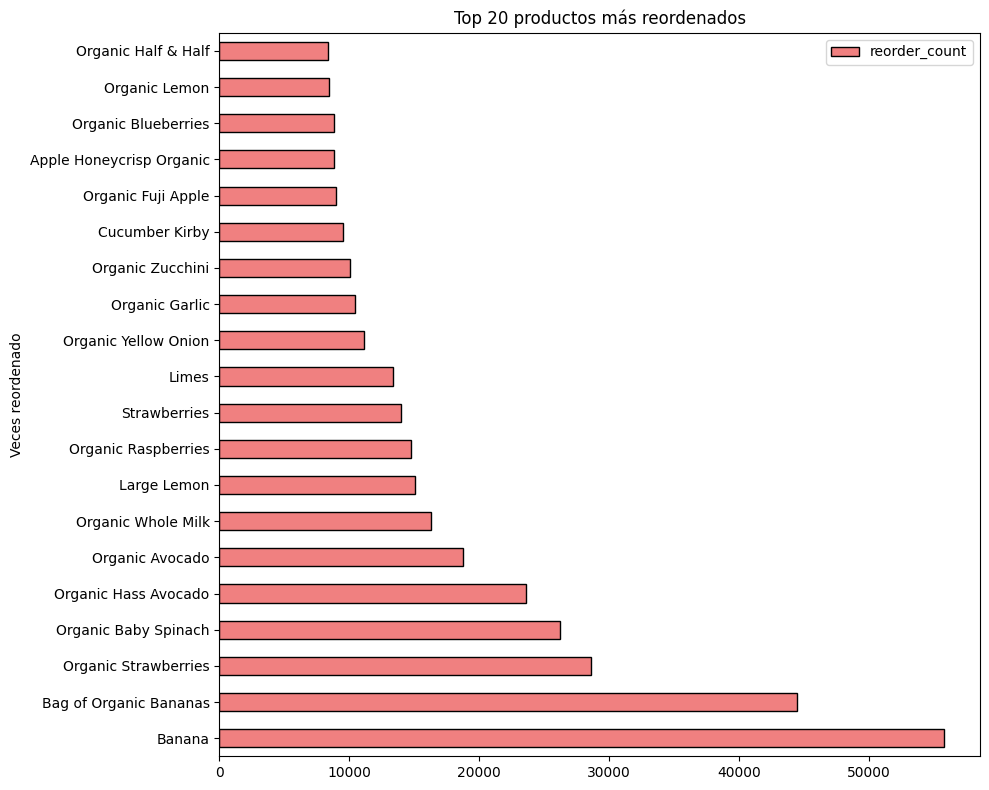

In [ ]:
# Graficar
top_reordered_products.plot(
    kind='barh',
    x='product_name',
    y='reorder_count',
    figsize=(10, 8),
    color='lightcoral',
    edgecolor='black',
    title='Top 20 productos más reordenados',
    xlabel='Veces reordenado',
    ylabel='Producto'
)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">

1. Los productos básicos dominan las recompras:  
Bananas, bolsas de bananas orgánicas, y fresas orgánicas son los productos más reordenados.  
Esto indica que los clientes tienden a repetir pedidos de productos frescos y esenciales en su dieta diaria.

2. Los productos orgánicos tienen alta fidelidad:  
Una gran proporción de los productos más reordenados son orgánicos (espinaca baby, aguacate hass, cebolla amarilla, ajo, leche, etc.).  
Esto sugiere que los consumidores que compran productos orgánicos tienden a ser consistentes en sus preferencias, lo cual puede ser aprovechado para campañas de fidelización o recomendaciones personalizadas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
# Proporción de reordenamiento = Veces que fue ordenado (total) / Veces que fue reordenado
# Agrupar por producto para obtener:
# - Total de veces ordenado (count)
# - Total de veces reordenado (sum de la columna 'reordered')
product_reorder_stats = order_products.groupby('product_id')['reordered'].agg(['sum', 'count']).reset_index()

# Renombrar columnas para claridad
product_reorder_stats.columns = ['product_id', 'total_reordered', 'total_orders']

# Calcular la proporción de reordenamiento
product_reorder_stats['reorder_ratio'] = product_reorder_stats['total_reordered'] / product_reorder_stats['total_orders']

# Unir con los nombres de producto
product_reorder_stats = product_reorder_stats.merge(products[['product_id', 'product_name']], on='product_id')

# Mostrar los primeros registros
product_reorder_stats.head()


,product_id,total_reordered,total_orders,reorder_ratio,product_name
0,1,158,280,0.564286,Chocolate Sandwich Cookies
1,2,0,11,0.000000,All-Seasons Salt
2,3,31,42,0.738095,Robust Golden Unsweetened Oolong Tea
3,4,25,49,0.510204,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,1,2,0.500000,Pure Coconut Water With Orange


In [ ]:
# Convertir reorder_ratio a porcentaje
product_reorder_stats['reorder_ratio'] = product_reorder_stats['reorder_ratio'] * 100

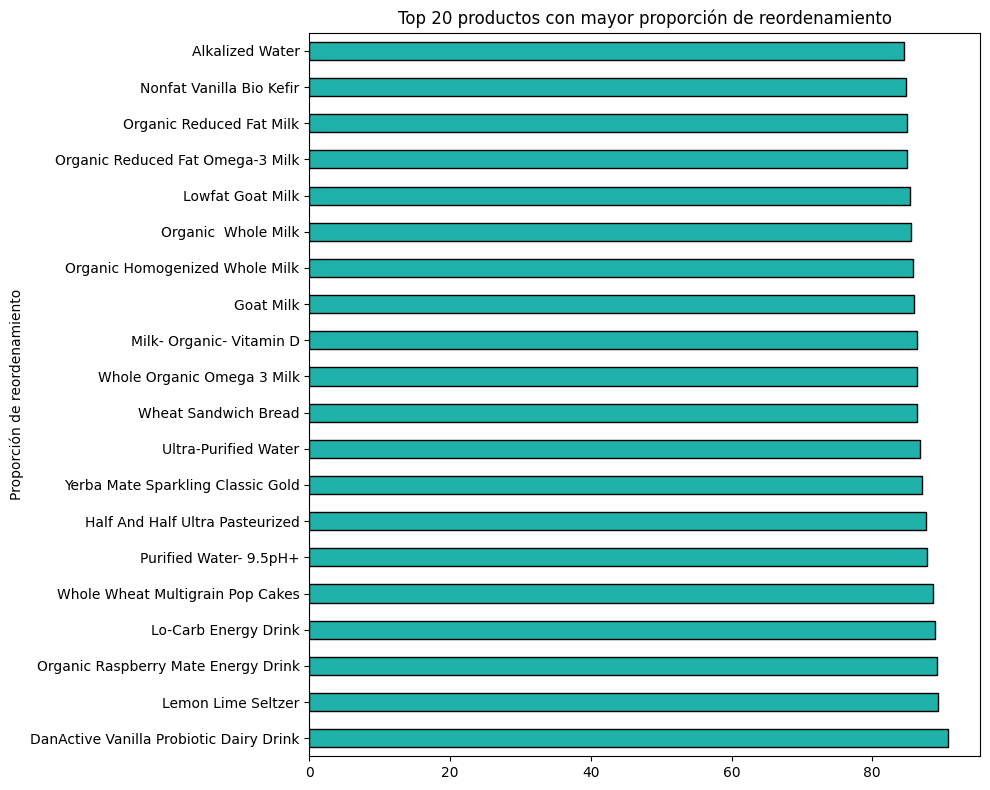

In [ ]:
# graficar los productos con mayor proporción de reordenamiento (reorder_ratio).

# Filtrar productos con al menos 50 órdenes
filtered = product_reorder_stats[product_reorder_stats['total_orders'] >= 50]

# Seleccionar top 20 productos con mayor proporción de reordenamiento
top_reorder_ratio = filtered.sort_values(by='reorder_ratio', ascending=False).head(20)

# Graficar
top_reorder_ratio.plot(
    kind='barh',
    x='product_name',
    y='reorder_ratio',
    legend=False,
    figsize=(10, 8),
    color='lightseagreen',
    edgecolor='black',
    title='Top 20 productos con mayor proporción de reordenamiento',
    xlabel='Proporción de reordenamiento',
    ylabel='Producto'
)

plt.tight_layout()
plt.show()


Escribe aquí tus conclusiones

<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">
    
- Lácteos y bebidas funcionales dominan el top de productos más reordenados, lo que sugiere hábitos de consumo frecuentes y fidelidad a ciertas marcas o tipos de productos (ej. leche orgánica, agua purificada).

- Productos como DanActive Vanilla Probiotic Dairy Drink o Lo-Carb Energy Drink tienen una alta retención, lo que puede indicar un nicho leal o necesidades específicas del consumidor.

- Estas métricas pueden ayudar a diseñar promociones o bundles con productos que los clientes ya tienden a repetir.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
print(order_products.columns)
print(orders.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')


In [ ]:
# Necesitamos unir order_products con orders, ya que:
# - order_products contiene: order_id, product_id, reordered
# - orders contiene: order_id, user_id

# Unir order_products con orders para obtener user_id
order_products_users = order_products.merge(orders[['order_id', 'user_id']], on='order_id')

# Agrupar por user_id para calcular:
# - total de productos pedidos
# - total de productos reordenados
customer_reorder_stats = order_products_users.groupby('user_id')['reordered'].agg(['sum', 'count']).reset_index()

# Renombrar columnas
customer_reorder_stats.columns = ['user_id', 'total_reordered', 'total_orders']

# Calcular la proporción
customer_reorder_stats['reorder_ratio'] = (customer_reorder_stats['total_reordered'] / customer_reorder_stats['total_orders']) * 100
customer_reorder_stats['reorder_ratio'] = customer_reorder_stats['reorder_ratio'].round(2)

# Mostrar los primeros registros
customer_reorder_stats.head()


,user_id,total_reordered,total_orders,reorder_ratio
0,2,1,26,3.85
1,4,0,2,0.00
2,5,8,12,66.67
3,6,0,4,0.00
4,7,13,14,92.86


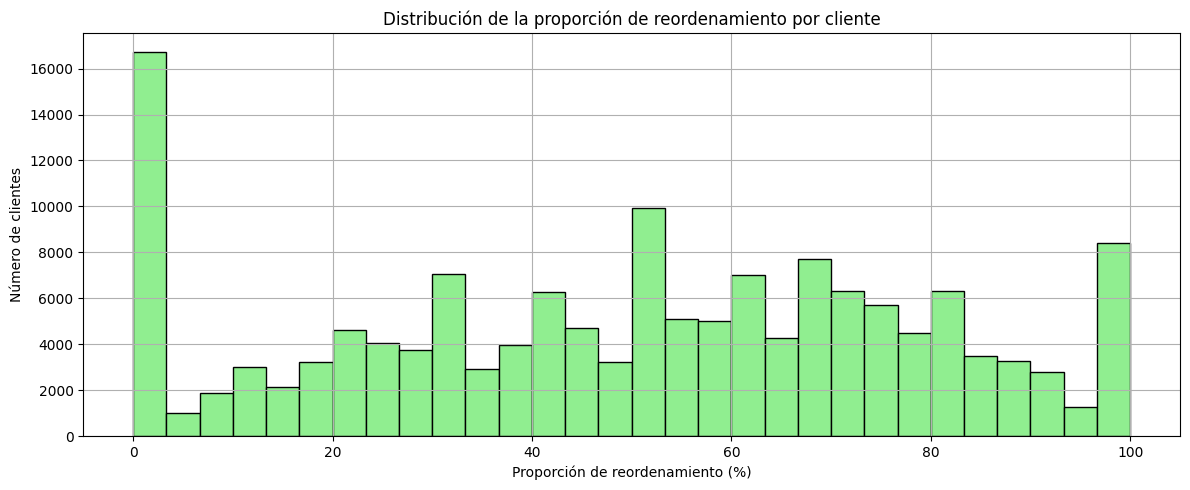

In [ ]:
#Graficar la proporción de reordenamiento por cliente
customer_reorder_stats['reorder_ratio'].hist(
    bins=30,
    figsize=(12,5),
    color='lightgreen',
    edgecolor='black'
)
plt.title('Distribución de la proporción de reordenamiento por cliente')
plt.xlabel('Proporción de reordenamiento (%)')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()


Escribe aquí tus conclusiones

<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">
    
1. Muchos clientes hacen pedidos completamente nuevos:  
Hay un pico muy alto en el 0%, lo que indica que miles de clientes nunca han reordenado un producto antes (probablemente es su primer pedido o aún no generan hábito).

2. Comportamientos variados en el resto de clientes:  
A partir del 10%, la proporción se distribuye de forma más uniforme, aunque se observa un ligero incremento en los grupos entre 50% y 70%.
Esto sugiere que muchos usuarios combinan productos nuevos y productos ya comprados.

3. Clientes muy leales a ciertos productos:  
También hay un pico al 100%, lo que indica que algunos clientes siempre reordenan productos ya conocidos, lo que habla de fidelidad o hábito fuerte de consumo.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [ ]:
# Filtrar solo los productos que fueron añadidos en primer lugar
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]

# Contar cuántas veces cada producto fue el primero en el carrito
first_counts = first_in_cart['product_id'].value_counts().head(20).reset_index()
first_counts.columns = ['product_id', 'first_in_cart_count']

# Unir con nombres de productos
top_first_products = first_counts.merge(products[['product_id', 'product_name']], on='product_id')

# Ordenar para visualización
top_first_products = top_first_products.sort_values(by='first_in_cart_count', ascending=False)

# Mostrar resultados
top_first_products

,product_id,first_in_cart_count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


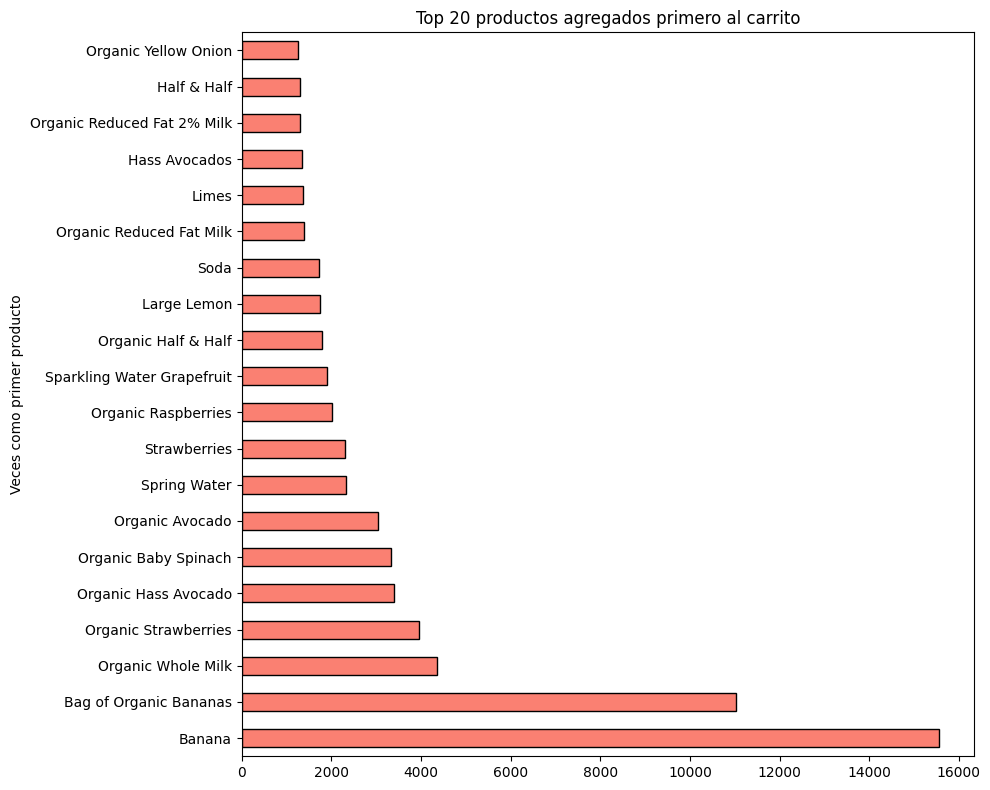

In [ ]:
# Graficar los productos más comunes como primeros en el carrito
top_first_products.plot(
    kind='barh',
    x='product_name',
    y='first_in_cart_count',
    legend=False,
    figsize=(10, 8),
    color='salmon',
    edgecolor='black',
    title='Top 20 productos agregados primero al carrito',
    xlabel='Veces como primer producto',
    ylabel='Producto'
)

plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">

1. Frutas básicas dominan el inicio de compras:  
- Banana y Bag of Organic Bananas son con gran diferencia los productos más comúnmente agregados primero. Esto indica que son productos altamente prioritarios o de consumo recurrente para la mayoría de los clientes.
- Su presencia destacada podría estar relacionada con su alta demanda, bajo precio o necesidad frecuente de reposición.  


2. Preferencia por productos frescos y orgánicos:
- Muchos de los productos en el top (como Organic Strawberries, Organic Avocado, Organic Baby Spinach) son frescos y/o orgánicos.
- Esto sugiere una fuerte inclinación del público hacia opciones saludables desde el inicio de su experiencia de compra.

3. Lácteos y bebidas también tienen presencia importante:
- Productos como Organic Whole Milk, Half & Half y Spring Water son prioritarios, probablemente por su uso diario en hogares y necesidad frecuente de reposición.

### Conclusion general del proyecto:

<div style="background-color:#d4edda; padding: 10px; border-radius: 5px;">

## Resumen Ejecutivo: Análisis de Comportamiento de Compra en Instacart
### Contexto del proyecto
Instacart es una plataforma de entregas de comestibles que permite a los usuarios realizar pedidos en línea y recibirlos en casa. Con el objetivo de conocer mejor los hábitos de compra de sus clientes, se  realizó un estudio exploratorio a partir de un subconjunto de datos representativo, el cual fue modificado intencionalmente para incluir valores ausentes y duplicados, aunque preservando la estructura y las distribuciones originales.

El conjunto analizado está compuesto por cinco tablas principales: 'orders', 'order_products', 'products', 'aisles' y 'departments'. Estas contienen información detallada sobre los pedidos, productos, categorías y comportamiento de compra, permitiendo una visión completa del ciclo de consumo.

### Metodología
El análisis se dividió en tres bloques de complejidad creciente:

1. [A] Preprocesamiento.  

Se identificaron y eliminaron registros duplicados para evitar sesgos en los análisis. También se manejaron los valores nulos según su impacto en las variables clave. Se integraron múltiples tablas para construir un modelo de datos consolidado, facilitando el cruce de información entre productos, usuarios y pedidos.

2. [B] Análisis exploratorio intermedio.  

Se desarrollaron visualizaciones que permitieron responder preguntas sobre los productos más populares, los más reordenados, y las conductas generales de compra por cliente. Se utilizó groupby, merge y distintos tipos de gráficos (hist, barh) para representar la información de forma clara y comprensible.

3. [C] Análisis avanzado.  

El bloque más complejo se enfocó en métricas específicas como la proporción de reordenamiento por producto y por cliente, y la identificación de los productos más frecuentemente colocados primero en los carritos. Estas métricas permitieron inferir niveles de fidelidad, hábitos recurrentes y productos ancla dentro de los patrones de compra.


### Principales hallazgos
- Comportamiento de los clientes:  
La mayoría de los usuarios realiza pocos pedidos y en general repiten productos. Se observó una distribución sesgada a la derecha en la cantidad de pedidos por cliente.

- Productos más pedidos y más reordenados:  
Frutas y productos orgánicos dominan ambas categorías, destacando el plátano y las fresas orgánicas. Esto indica un alto grado de fidelización hacia productos frescos y saludables.

- Proporción de reordenamiento por producto:  
Algunos productos, como ciertos tipos de leche, agua purificada y yogures, tienen tasas de reordenamiento superiores al 85%, lo que sugiere hábitos de compra altamente repetitivos en categorías esenciales.

- Proporción de reordenamiento por cliente:  
Existen distintos perfiles de usuarios: desde quienes rara vez repiten productos hasta quienes lo hacen en más del 80% de sus pedidos. Esta segmentación es clave para diseñar campañas personalizadas.

- Productos añadidos primero al carrito:  
Los productos colocados primero suelen ser básicos, como plátanos, leche o agua. Esto confirma su rol como “productos ancla” en la decisión de compra.

### Recomendaciones Estratégicas
Con base en los hallazgos, se sugieren las siguientes acciones concretas de marketing y negocio:

1. Campañas de reordenamiento automático:
- Activar recordatorios personalizados para los productos más reordenados con mensajes como:"¿Quieres repetir tu última compra de [producto] esta semana?"
- Implementar un botón de "reordenar mis esenciales" con los productos más frecuentes de cada usuario.

2. Cross-selling basado en patrones de fidelidad:
- Ofrecer recomendaciones complementarias en productos con alto reorder ratio, por ejemplo: "Quienes compran leche orgánica también piden pan integral artesanal."
- Crear combos promocionales de productos recurrentes.

3. Posicionamiento de productos ancla:
- Dar visibilidad prioritaria a productos que suelen ser los primeros en el carrito (como el plátano o la leche), ya que su presencia parece motivar la continuación de la compra.

4. Segmentación de clientes por comportamiento:
- Etiquetar a los usuarios según su ratio de reordenamiento y personalizar mensajes:
  - A los “exploradores”: sugerencias de nuevos productos o lanzamientos.
  - A los “leales”: descuentos por repetición o beneficios por fidelidad.

5. Optimización del inventario y distribución:
- Garantizar alta disponibilidad y entregas prioritarias para los productos con alta frecuencia de pedido y reordenamiento.
- Alinear el surtido de almacén según los productos ancla para mejorar la eficiencia logística.

### Conclusión General
El análisis permitió identificar patrones claros de consumo en Instacart, con una fuerte inclinación hacia productos orgánicos, saludables y de alta recurrencia. La plataforma cuenta con una base sólida de clientes con comportamientos estables, lo cual representa una gran oportunidad para fortalecer la fidelización mediante acciones de marketing personalizadas, automatización de reordenamientos y una gestión más eficiente del surtido y distribución.

El enfoque analítico empleado integró diversas fuentes de datos y aplicó técnicas de limpieza, agrupación y visualización para obtener insights accionables. La claridad en los hallazgos y la propuesta estratégica responden a los objetivos del análisis, alineándose con las mejores prácticas de análisis de datos para e-commerce.

